In [1]:
# Loan and LoanAmortizer classes should be defined as in your full implementation.
# This script generates amortization plots for fixed, ARM, HELOC, balloon, and curtailment loans.

import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from mortgagemodeler import Loan
from mortgagemodeler import LoanAmortizer



In [3]:

# Helpers for plotting

def plot_amortization_components(amort_df, title="Loan Amortization", figsize=(12, 5)):
    plt.figure(figsize=figsize)
    plt.plot(amort_df["Month"], amort_df["Principal"], label="Principal")
    plt.plot(amort_df["Month"], amort_df["Interest"], label="Interest")
    if "PMI/MIP" in amort_df.columns:
        plt.plot(amort_df["Month"], amort_df["PMI/MIP"], label="PMI/MIP")
    if "Extra Payment" in amort_df.columns and amort_df["Extra Payment"].max() > 0:
        plt.plot(amort_df["Month"], amort_df["Extra Payment"], label="Extra Payment")
    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Monthly Amount ($)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_arm_payments(loan: Loan, label: str, **kwargs):
    amort = LoanAmortizer(loan, **kwargs)
    df = amort.to_dataframe()
    plt.figure(figsize=(10, 4))
    plt.plot(df["Month"], df["Payment"], label=label)
    plt.title("ARM Monthly Payments Over Time")
    plt.xlabel("Month")
    plt.ylabel("Total Monthly Payment ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_balance_over_time(loan: Loan, label: str, **kwargs):
    amort = LoanAmortizer(loan, **kwargs)
    df = amort.to_dataframe()
    plt.figure(figsize=(10, 4))
    plt.plot(df["Month"], df["Ending Balance"], label=label)
    plt.title(f"Loan Balance Over Time — {label}")
    plt.xlabel("Month")
    plt.ylabel("Ending Balance ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
# Loan definitions (align with actual Loan class, no pmi_rate assumed)

# Simulated forward SOFR values from 2029 onward
custom_rate_schedule = {
    "2029-01-01": 3.75,
    "2029-07-01": 4.25,
    "2030-01-01": 4.75,
    "2030-07-01": 5.25,
    "2031-01-01": 5.50,
    "2031-07-01": 5.75,
    "2032-01-01": 5.50,
    "2032-07-01": 5.25,
    "2033-01-01": 5.00,
}

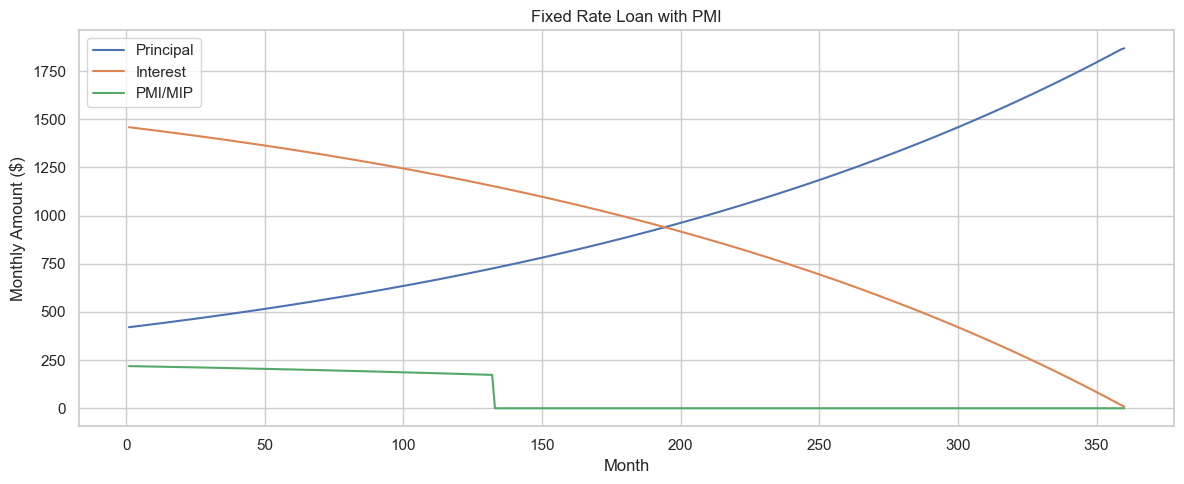

In [7]:

# Plot
loan_fixed_pmi = Loan.fixed(350000, 360, 5, date(2024, 1, 1), pmi=True)
amort_fixed = LoanAmortizer(loan_fixed_pmi)
plot_amortization_components(amort_fixed.to_dataframe(), "Fixed Rate Loan with PMI")

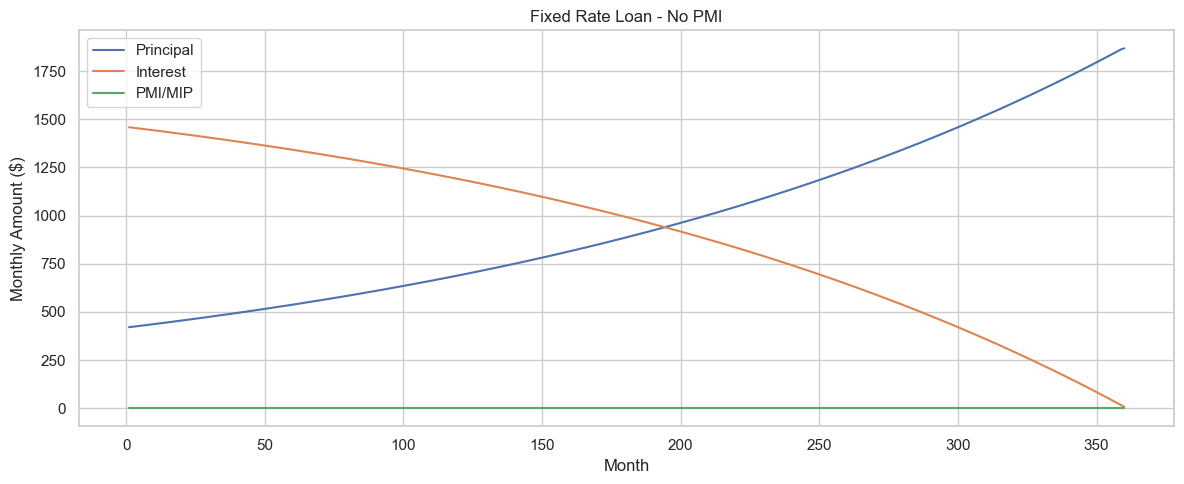

In [9]:

# Plot
loan_fixed_no_pmi = Loan.fixed(350000, 360, 5, date(2024, 1, 1), pmi=False)
amort_fixed = LoanAmortizer(loan_fixed_no_pmi)
plot_amortization_components(amort_fixed.to_dataframe(), "Fixed Rate Loan - No PMI")

In [11]:
amort_fixed.to_dataframe().head()

,Month,Date,Beginning Balance,Payment,Principal,Interest,PMI/MIP,Extra Payment,Total Payment,Ending Balance,Effective Rate
0,1,2024-01-31,350000.00,1878.88,420.55,1458.33,0.0,0.0,1878.88,349579.45,5.0
1,2,2024-03-01,349579.45,1878.88,422.30,1456.58,0.0,0.0,1878.88,349157.15,5.0
2,3,2024-03-31,349157.15,1878.88,424.06,1454.82,0.0,0.0,1878.88,348733.09,5.0
3,4,2024-04-30,348733.09,1878.88,425.83,1453.05,0.0,0.0,1878.88,348307.26,5.0
4,5,2024-05-30,348307.26,1878.88,427.60,1451.28,0.0,0.0,1878.88,347879.66,5.0


⚠️  RateReader: File not found at /opt/anaconda3/lib/python3.12/site-packages/mortgagemodeler/utils/../data/macroeconforward.txt. Falling back to static index + margin logic.


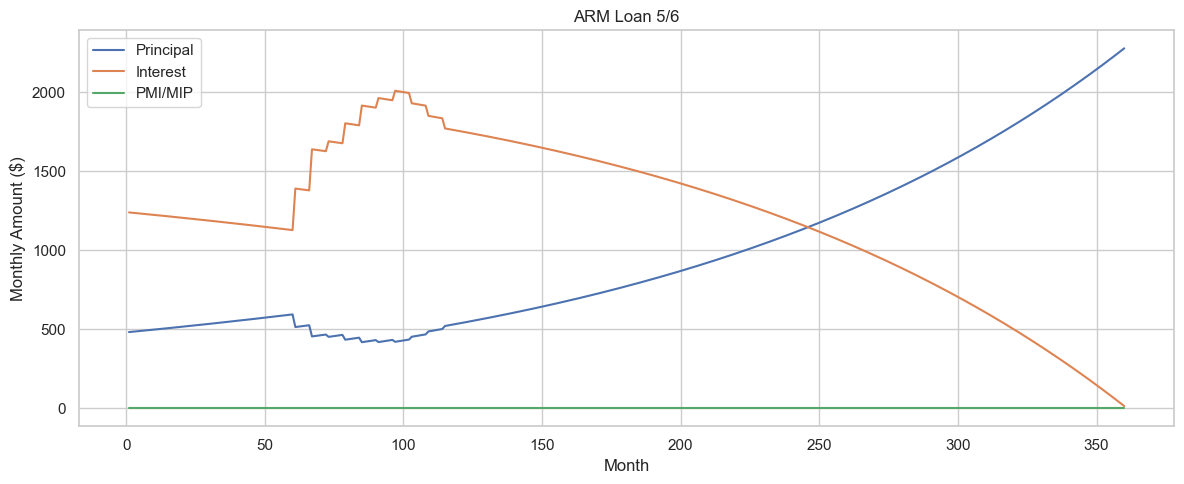

In [13]:

loan_arm_5_6 = Loan.from_arm(350000, 360, '5/6', 'SOFR', 2.25, date(2024, 1, 1), rate=4.25, forward_curve=custom_rate_schedule)

# Amortizers
amort_arm_5_6 = LoanAmortizer(loan_arm_5_6,custom_rate_schedule)

plot_amortization_components(amort_arm_5_6.to_dataframe(), "ARM Loan 5/6")

⚠️  RateReader: File not found at /opt/anaconda3/lib/python3.12/site-packages/mortgagemodeler/utils/../data/macroeconforward.txt. Falling back to static index + margin logic.


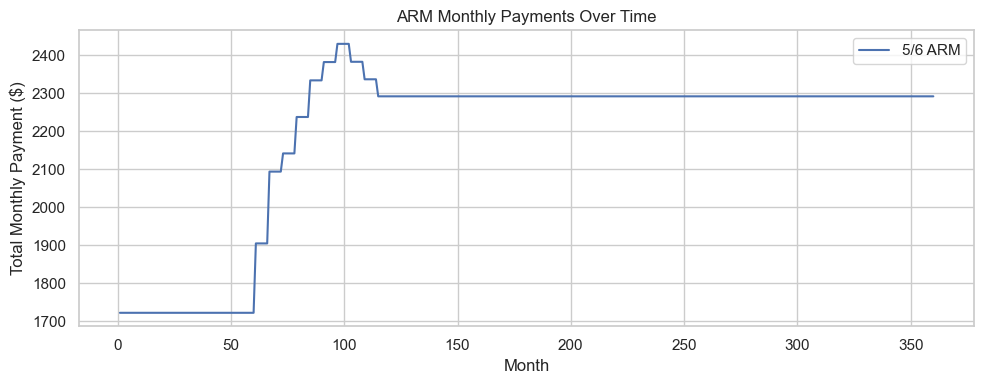

In [15]:
plot_arm_payments(loan_arm_5_6, label="5/6 ARM")

⚠️  RateReader: File not found at /opt/anaconda3/lib/python3.12/site-packages/mortgagemodeler/utils/../data/macroeconforward.txt. Falling back to static index + margin logic.


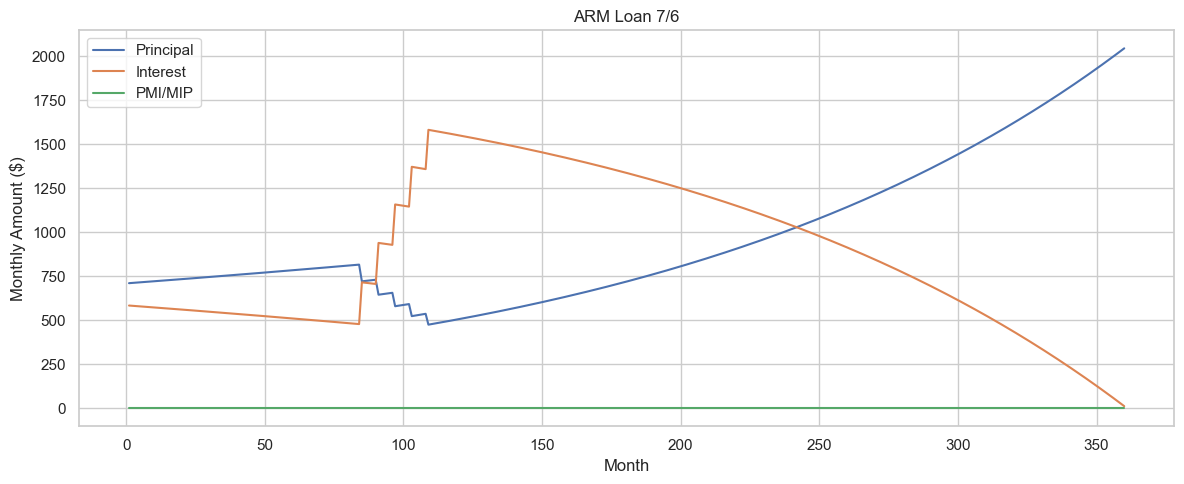

In [17]:
loan_arm_7_6 = Loan.from_arm(350000, 360, '7/6', 'SOFR', 2.0, date(2024, 1, 1), rate=2.0, forward_curve=custom_rate_schedule)
amort_arm_7_6 = LoanAmortizer(loan_arm_7_6,custom_rate_schedule)
plot_amortization_components(amort_arm_7_6.to_dataframe(), "ARM Loan 7/6")

⚠️  RateReader: File not found at /opt/anaconda3/lib/python3.12/site-packages/mortgagemodeler/utils/../data/macroeconforward.txt. Falling back to static index + margin logic.


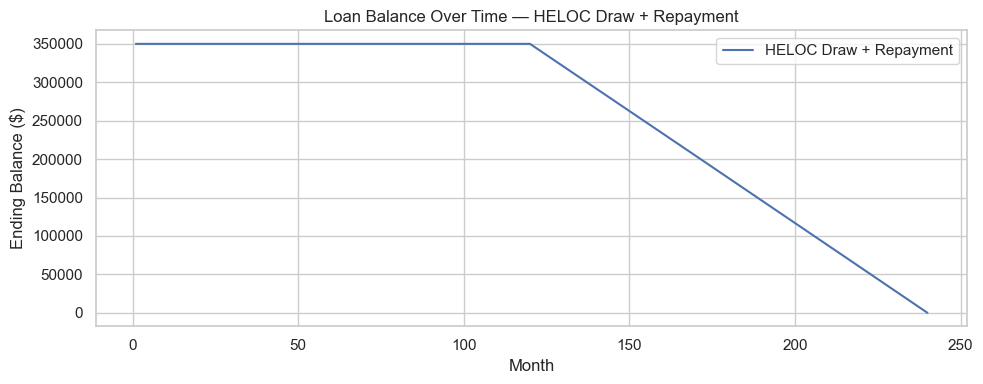

In [19]:
loan_heloc = Loan(350000, 240, 0.06, date(2024, 1, 1), loan_type='heloc', draw_period_months=120, repayment_term_months=120)

plot_balance_over_time(loan_heloc, label="HELOC Draw + Repayment")

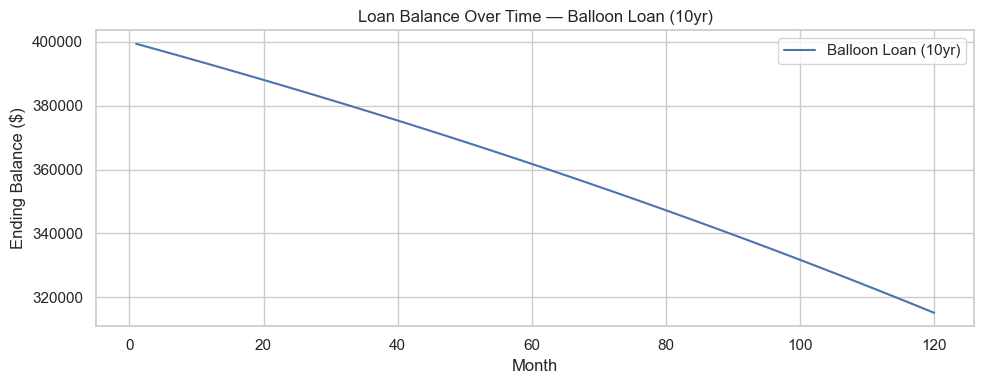

In [21]:
# Balloon Example: Ends at 10 years
loan_balloon = Loan.fixed(
    principal=400000,
    term=360,
    rate=4.0,
    origination_date=date(2020, 1, 1)
)

plot_balance_over_time(loan_balloon, label="Balloon Loan (10yr)", balloon_month=120)

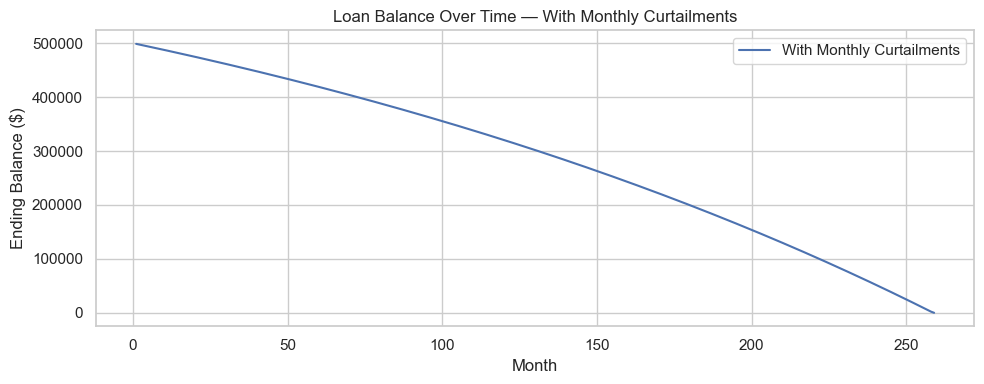

In [23]:
loan_curtail = Loan.fixed(
    principal=500000,
    term=360,
    rate=4.0,
    origination_date=date(2020, 1, 1),
    extra_payment_amount=500,
    extra_payment_frequency='monthly'
)
plot_balance_over_time(loan_curtail, label="With Monthly Curtailments")

⚠️  RateReader: File not found at /opt/anaconda3/lib/python3.12/site-packages/mortgagemodeler/utils/../data/macroeconforward.txt. Falling back to static index + margin logic.


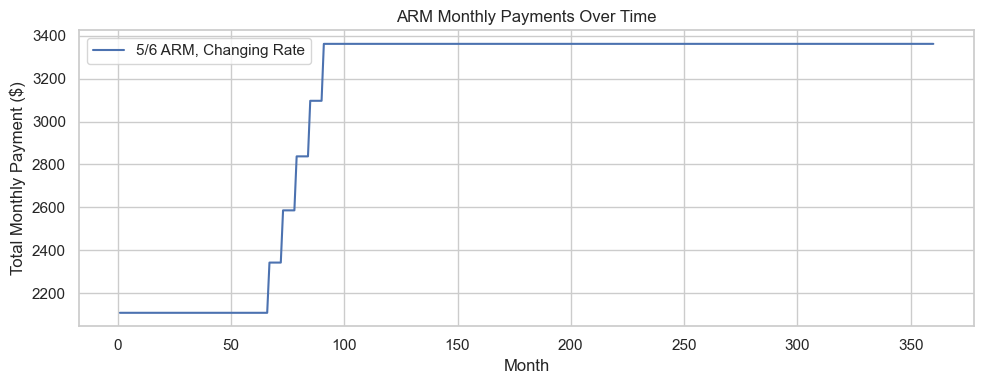

In [25]:
# Manually override RateReader by injecting a forward curve
forward_curve = {
    "2029-02-01": 4.5,
    "2030-02-01": 5.0,
    "2031-02-01": 5.5,
    "2032-02-01": 6.0,
}

loan_arm = Loan.from_arm(
    principal=500000,
    term=360,
    arm_type="5/6",
    index="SOFR",
    margin=2.5,
    rate=3.0,
    origination_date=date(2024, 1, 1),
    caps=(2, 1, 5),
    floors=(0, 0, 0),
    forward_curve=forward_curve
)

plot_arm_payments(loan_arm, label="5/6 ARM, Changing Rate", custom_rate_schedule=forward_curve)


⚠️  RateReader: File not found at /opt/anaconda3/lib/python3.12/site-packages/mortgagemodeler/utils/../data/macroeconforward.txt. Falling back to static index + margin logic.


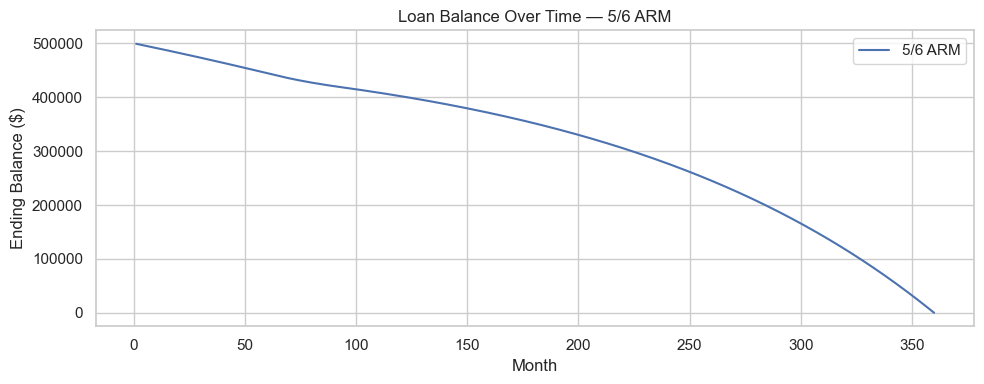

In [27]:
plot_balance_over_time(loan_arm, label="5/6 ARM", custom_rate_schedule=forward_curve)

In [29]:
loan_arm.to_dict()

{'principal': 500000.0,
 'term_months': 360,
 'rate': 3.0,
 'start_date': '2024-01-01',
 'type': 'ARM',
 'is_fixed': False,
 'is_arm': True,
 'is_fha': False,
 'is_va': False,
 'is_usda': False,
 'is_heloc': False,
 'has_pmi': False,
 'extra_payment_amount': 0.0,
 'extra_payment_frequency': None}

In [31]:
loan_curtail = Loan.fixed(
    principal=500000,
    term=360,
    rate=4.0,
    origination_date=date(2020, 1, 1),
    extra_payment_amount=500,
    extra_payment_frequency='monthly'
)

amort = LoanAmortizer(loan_curtail)
df = amort.to_dataframe()
print(df.tail(20))

     Month        Date  Beginning Balance  Payment  Principal  Interest  \
239    240  2039-09-18           55086.87  2387.08    2203.46    183.62   
240    241  2039-10-18           52383.41  2387.08    2212.47    174.61   
241    242  2039-11-17           49670.94  2387.08    2221.51    165.57   
242    243  2039-12-17           46949.43  2387.08    2230.58    156.50   
243    244  2040-01-16           44218.85  2387.08    2239.68    147.40   
244    245  2040-02-15           41479.17  2387.08    2248.82    138.26   
245    246  2040-03-16           38730.35  2387.08    2257.98    129.10   
246    247  2040-04-15           35972.37  2387.08    2267.17    119.91   
247    248  2040-05-15           33205.20  2387.08    2276.40    110.68   
248    249  2040-06-14           30428.80  2387.08    2285.65    101.43   
249    250  2040-07-14           27643.15  2387.08    2294.94     92.14   
250    251  2040-08-13           24848.21  2387.08    2304.25     82.83   
251    252  2040-09-12   

In [33]:
amort = LoanAmortizer(loan_arm)
df = amort.to_dataframe()
print(df.head(75))

⚠️  RateReader: File not found at /opt/anaconda3/lib/python3.12/site-packages/mortgagemodeler/utils/../data/macroeconforward.txt. Falling back to static index + margin logic.
    Month        Date  Beginning Balance  Payment  Principal  Interest  \
0       1  2024-01-31          500000.00  2108.02     858.02   1250.00   
1       2  2024-03-01          499141.98  2108.02     860.17   1247.85   
2       3  2024-03-31          498281.81  2108.02     862.32   1245.70   
3       4  2024-04-30          497419.49  2108.02     864.47   1243.55   
4       5  2024-05-30          496555.02  2108.02     866.63   1241.39   
..    ...         ...                ...      ...        ...       ...   
70     71  2029-10-31          434974.60  2342.20     892.28   1449.92   
71     72  2029-11-30          434082.32  2342.20     895.26   1446.94   
72     73  2029-12-30          433187.06  2585.68     780.73   1804.95   
73     74  2030-01-29          432406.33  2585.68     783.99   1801.69   
74     75  